___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedShuffleSplit

import pandas as pd

# Random Forest

A Random Forest is an ensemble learning method used for both classification and regression tasks. It is built upon the idea of decision trees, which are individual models that make decisions based on input features. However, instead of relying on a single decision tree, a Random Forest combines the predictions of multiple decision trees to improve overall accuracy and generalization.

Here's how a Random Forest works:

- Bootstrap Sampling (Bagging): Random Forest starts by creating multiple subsets of the original dataset through a process called **bootstrap sampling**. This involves randomly selecting samples from the dataset with replacement.
- Random Feature Selection: When building each decision tree in the forest, a random subset of features is considered at each split. This helps to introduce diversity among the trees and reduces the risk of overfitting.
- Decision Tree Construction: Decision trees are constructed based on the selected samples and features. Each tree in the forest is grown as a full tree without pruning.
- Voting or Averaging: For classification tasks, the predictions of individual trees are combined through a majority voting process. In regression tasks, the predictions are averaged.

Random Forests offer several advantages, including:
- Reduced Overfitting: The combination of multiple trees reduces the risk of overfitting compared to a single decision tree.
- Improved Accuracy: The ensemble approach often results in better overall predictive performance.
- Feature Importance: Random Forests provide a measure of feature importance, indicating which features contribute more to the model's predictions.

The pruning of the trees in the forest is not necessary since the random feature selection and the bootstrap sampling already reduce the risk of overfitting. However, pruning can be applied to further improve the model's performanc. E.g., we can limit the maximum depth of the trees or the maximum number of leaf nodes.

Random Forests are widely used in machine learning due to their robustness and versatility. They can handle a variety of data types, handle missing values, and perform well in a range of applications.

E.g., Random Forests can be applied to classification and regression tasks as we will see in the following. 

## Classification
In this section we will examine the classification problem and the problem of training Random Forests for classification tasks. We use the Iris data set to train Random Forests.

So, let's start...

In [2]:
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target, 
                                                    train_size=.75,
                                                    random_state=42)

rfc = RandomForestClassifier(
        n_estimators=100, # number of trees
        n_jobs=-1, # use all cores
        min_samples_leaf=3, # minimum number of samples required to be at a leaf node
        max_leaf_nodes=20, # maximum number of leaf nodes
).fit(X_train, y_train)

Now let's see how well the model performs on the training and test data.

In [3]:
scores = rfc.score(X_train, y_train)
print(f'scores:{scores}\nmu:{scores.mean()}')      

scores:0.9642857142857143
mu:0.9642857142857143


In [4]:
scores = rfc.score(X_test, y_test)
print(f'scores:{scores}\nmu:{scores.mean()}')      

scores:1.0
mu:1.0


To make a more robust evaluation of the model, we can use cross-validation.

In [5]:
sss = StratifiedShuffleSplit(
    n_splits=5, 
    random_state=42
)

rfc = RandomForestClassifier(
        n_estimators=100,
        n_jobs=-1,
        min_samples_leaf=3, # minimum number of samples required to be at a leaf node
        max_leaf_nodes=20, # maximum number of leaf nodes
)

scores = cross_val_score(
    rfc,  
    iris.data, 
    iris.target, 
    cv=sss
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[0.86666667 0.93333333 1.         1.         1.        ]
mu:0.96


What are you conclusions?

## Regression

As already mentioned, Random Forests can also be used for regression tasks. In this section we will examine the problem of training Random Forests for regression tasks. We use the Seoul Bike Sharing Demand data set to train Random Forests. This is a already preprocessed data set, so we can focus on the Random Forests.

In [6]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('./../../Datasets/SeoulBikeData.csv')

# transform categorical columns into dummy variables
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

# make sure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# create new columns for month, day, and day of week
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week

# drop the original date column
df.drop('Date', axis=1, inplace=True)

# Get X and y data
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

As usual, we split the data into training and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    random_state=42,
                                                    test_size=0.1)

X_test

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,month,day,day_of_week
6056,8,27.2,69,1.8,1999,21.0,0.70,0.0,0.0,False,True,False,True,True,8,10,4
5556,12,32.6,51,2.1,800,21.1,3.21,0.0,0.0,False,True,False,True,True,7,20,4
5990,14,34.0,50,1.2,1744,22.1,1.68,0.0,0.0,False,True,False,True,True,8,7,1
7674,18,16.9,47,1.4,1637,5.5,0.11,0.0,0.0,False,False,False,True,True,10,16,1
3319,7,6.4,51,1.0,1398,-3.0,0.19,0.0,0.0,True,False,False,True,True,4,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,22,8.8,77,3.2,1258,4.9,0.00,0.0,0.0,True,False,False,True,True,4,14,5
7230,6,14.4,61,1.2,2000,6.9,0.00,0.0,0.0,False,False,False,True,False,9,28,4
7103,23,17.9,66,1.0,2000,11.4,0.00,0.0,0.0,False,False,False,True,True,9,22,5
1527,15,3.6,26,2.4,1687,-14.1,0.99,0.0,0.0,False,False,True,True,True,2,2,4


Now let's train a Random Forest Regressor.

In [8]:
rfr = RandomForestRegressor( 
        n_estimators=100,
        n_jobs=-1,
        min_samples_leaf=3, # minimum number of samples required to be at a leaf node
        max_leaf_nodes=20, # maximum number of leaf nodes
        random_state=42).fit(X_train, y_train)

y_pred = rfr.predict(X_test)

score = rfr.score(X_test, y_test)
score        

0.7873710271859935

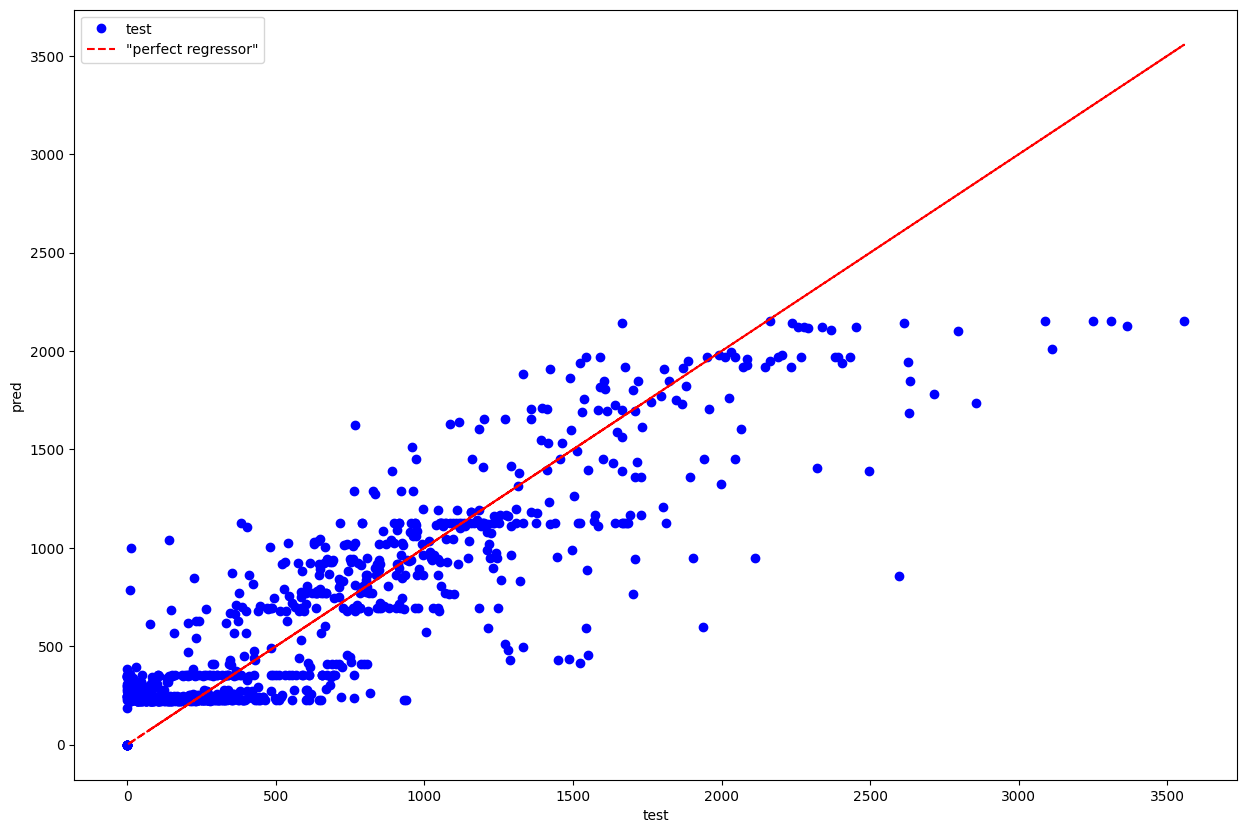

In [9]:
y_pred = rfr.predict(X_test)

plt.figure(figsize=(15,10))

plt.plot(y_test, y_pred, c='b', marker='o', linestyle='')
plt.plot(y_test, y_test, c='r', linestyle='--')
plt.xlabel('test')
plt.ylabel('pred')

plt.legend(["test", '"perfect regressor"'])

To make a more robust evaluation of the model, we can use cross-validation.

In [10]:
from sklearn.model_selection import ShuffleSplit


rfr = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1,
    min_samples_leaf=3, # minimum number of samples required to be at a leaf node
    max_leaf_nodes=20, # maximum number of leaf nodes
)

scores = cross_val_score(
    rfr, # model
    X, 
    y,
    cv=12
)

print(f'scores:{scores}\nmu:{scores.mean()}')

scores:[-0.17014521  0.00998305 -0.0214858   0.04443584  0.70224263  0.78161885
  0.69813152  0.74875121  0.55838061  0.7686028   0.63129036  0.32921734]
mu:0.423418601017085


Have a look at the following lines and propose a theory to explain the not so good results.

In [11]:
df = pd.read_csv('./../../Datasets/SeoulBikeData.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

f'The records are from {df.Date.min()} to {df.Date.max()}'

'The records are from 2017-12-01 00:00:00 to 2018-11-30 00:00:00'